                                                     DATA SCIENCE

Task 04:
    
Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.



In [88]:
#Importing libraries/dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
#Load the dataset to the pandas dataframe
df=pd.read_csv("C:/Users/Lezan/Documents/Prodigy internship/task4.csv",encoding='unicode_escape')

In [5]:
#printing the dataframe
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
#Assigning names to the different feilds of data frame
df.columns = ['id', 'entity', 'sentiment', 'text']

In [7]:
#Printing the dataframe
df

,id,entity,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [8]:
#Printing the first five records of the dataframe
df.head()

,id,entity,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [9]:
#Printing the last five record of the dataframe
df.tail()

,id,entity,sentiment,text
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...
74680,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [10]:
#Printing the random five record of the dataframe
df.sample(5)

,id,entity,sentiment,text
24625,4627,Google,Neutral,@ sandramy2B The Scam Shield app is here! Go t...
6210,269,Amazon,Positive,"I couldn't agree more, it's great."
10114,12941,Xbox(Xseries),Positive,PS5 launching even a penny later than the Xbox...
21366,4058,CS-GO,Irrelevant,Tf is homeboy doing? Mf acting like this is CSGO.
74430,9156,Nvidia,Positive,And there it is. Wow.


In [11]:
#information on total number of rows,columns,data type of each column and memory requirement
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74681 non-null  int64 
 1   entity     74681 non-null  object
 2   sentiment  74681 non-null  object
 3   text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [12]:
#Statistical measures
df.describe(include='all')

,id,entity,sentiment,text
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69488
top,NaN,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [13]:
#Printing the number of rows and columns
df.shape

(74681, 4)

In [14]:
#displaying the columns
df.columns

Index(['id', 'entity', 'sentiment', 'text'], dtype='object')

In [15]:
#Printing the datatype of different columns
df.dtypes

id            int64
entity       object
sentiment    object
text         object
dtype: object

In [16]:
#Displaying the number of unique values in each column of the dataframe
df.nunique()

id           12447
entity          32
sentiment        4
text         69488
dtype: int64

In [17]:
#Printing the unique values in the sentiment column
df['sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [18]:
#Printing the unique values in the entity column
df['entity'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [19]:
#Checking if there are any missing values
df.isnull().sum()

id             0
entity         0
sentiment      0
text         686
dtype: int64

In [20]:
#Displaying the duplicate values in the dataframe
df.duplicated().sum()

2701

In [21]:
#Droping the rows with missing values
df.dropna(inplace=True)

In [22]:
#Displaying the rows and columns in the dataframe after dropping missing values
df.shape

(73995, 4)

In [23]:
#Printing null values in the dataframe
df.isnull().sum()

id           0
entity       0
sentiment    0
text         0
dtype: int64

In [24]:
#Droping the rows with dupliacte values
df.drop_duplicates(inplace=True)

In [25]:
#Displaying the rows and columns in the dataframe after dropping duplicate values
df.shape

(71654, 4)

In [26]:
#Displaying the duplicate values in the dataframe
df.duplicated().sum()

0

In [27]:
#Displaying the count of categories in the sentiment column
senti_counts = df['sentiment'].value_counts()
senti_counts
     

Negative      21698
Positive      19712
Neutral       17707
Irrelevant    12537
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Sentiment Distribution')

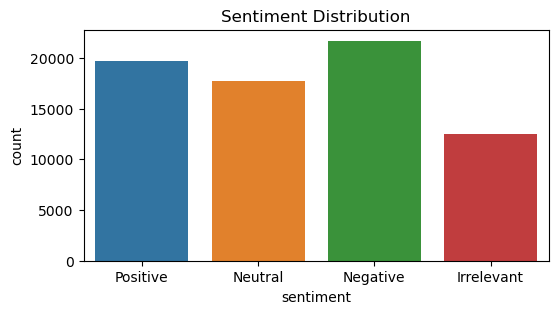

In [28]:
#PLotting the count of categories in the sentiment column.
plt.figure(figsize=(6, 3))
sns.countplot(x='sentiment',data=df)
plt.title('Sentiment Distribution')

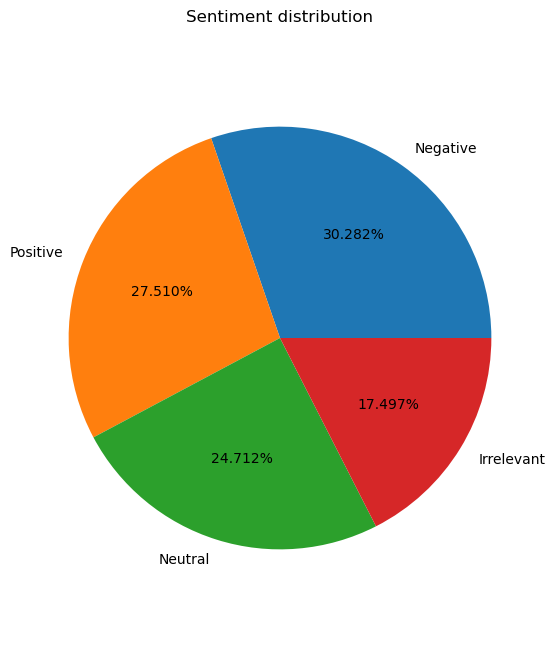

In [29]:
#Pie chart representation of the count of categories in the sentiment column
plt.figure(figsize=(6,8))
plt.pie(senti_counts, labels=senti_counts.index,autopct='%1.3f%%')
plt.title('Sentiment distribution')
plt.axis('equal')  
plt.show()

In [30]:
# Calculate the distribution of entities
entity_distri = df['entity'].value_counts()

In [31]:
#printing the distribution of entities
entity_distri

TomClancysRainbowSix                 2328
Verizon                              2319
MaddenNFL                            2314
CallOfDuty                           2314
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
TomClancysGhostRecon                 2291
Facebook                             2289
ApexLegends                          2278
johnson&johnson                      2257
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
GrandTheftAuto(GTA)                  2208
Borderlands                          2205
Xbox(Xseries)                        2201
Google                            

In [32]:
# Select the top 5 entities
top5_entities = entity_distri.head(5).index

In [33]:
#Displaying the top 5 entities
top5_entities

Index(['TomClancysRainbowSix', 'Verizon', 'MaddenNFL', 'CallOfDuty',
       'Microsoft'],
      dtype='object')

In [34]:
#Creating a dataframe with the data of top five entities
df1 = df[df['entity'].isin(top5_entities)]

In [35]:
#Printing the new dataframe
df1

,id,entity,sentiment,text
34925,8001,Microsoft,Irrelevant,Very good of you to remind us. I thought it wa...
34926,8001,Microsoft,Irrelevant,"I thought it was GE, but they sold!"
34928,8001,Microsoft,Irrelevant,Very good of you to remind Anna. I thought it ...
34929,8001,Microsoft,Irrelevant,Very good of you to remind those us. I had tho...
34930,8001,Microsoft,Irrelevant,Very good of you to remind us. I thought it sa...
...,...,...,...,...
65399,8000,MaddenNFL,Negative,2k5 was the best football game I ever had.. Go...
65401,8000,MaddenNFL,Negative,2k5 was the best football game I've ever had.
65402,8000,MaddenNFL,Negative,2k5 was the best video game I ever had.. Gon o...
65403,8000,MaddenNFL,Negative,2k5 which was the 7th best football championsh...


Text(0, 0.5, 'count')

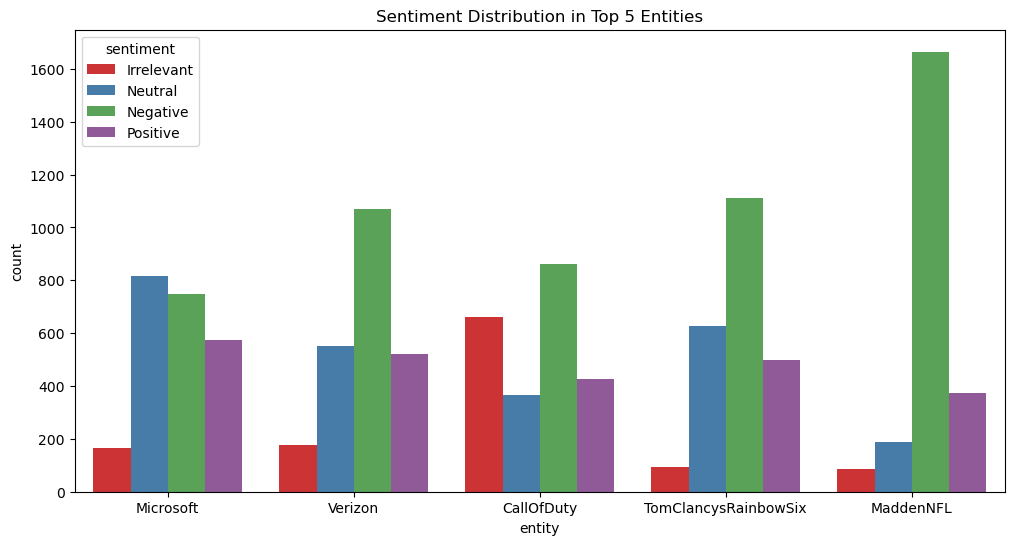

In [36]:
#Plot representing Sentiment Distribution in Top 5 Entities
plt.figure(figsize=(12, 6))
sns.countplot(x='entity', hue='sentiment', data=df1,palette='Set1')
plt.title('Sentiment Distribution in Top 5 Entities')
plt.xlabel('entity')
plt.ylabel('count')

In [67]:
#Displaying all string punctuations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [73]:
#Displaying all the stopwords in english
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

(-0.5, 99.5, 99.5, -0.5)

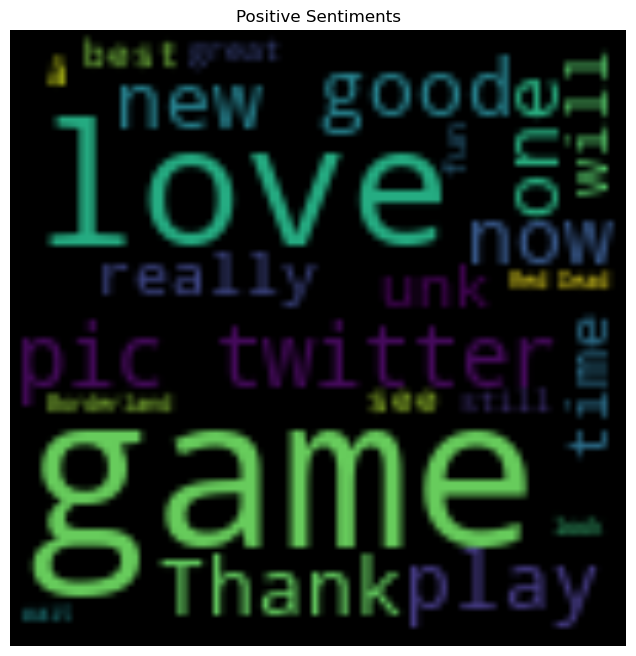

In [43]:
#Wordcloud representation of positive sentiments
plt.figure(figsize=(8,8))
pos_tweets=df[df['sentiment']=='Positive']
pos_text = ''.join(pos_tweets['text'])
wordcloud=WordCloud(width=100,height=100).generate(pos_text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Positive Sentiments')
plt.axis('off')

(-0.5, 99.5, 99.5, -0.5)

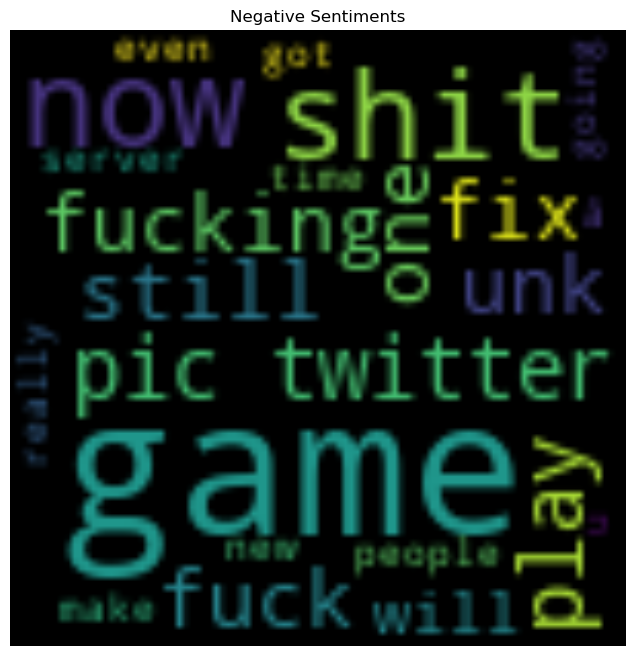

In [45]:
#Wordcloud representation of negative sentiments
plt.figure(figsize=(8,8))
neg_tweets=df[df['sentiment']=='Negative']
neg_text = ''.join(neg_tweets['text'])
wordcloud=WordCloud(width=100,height=100).generate(neg_text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Negative Sentiments')
plt.axis('off')

(-0.5, 99.5, 99.5, -0.5)

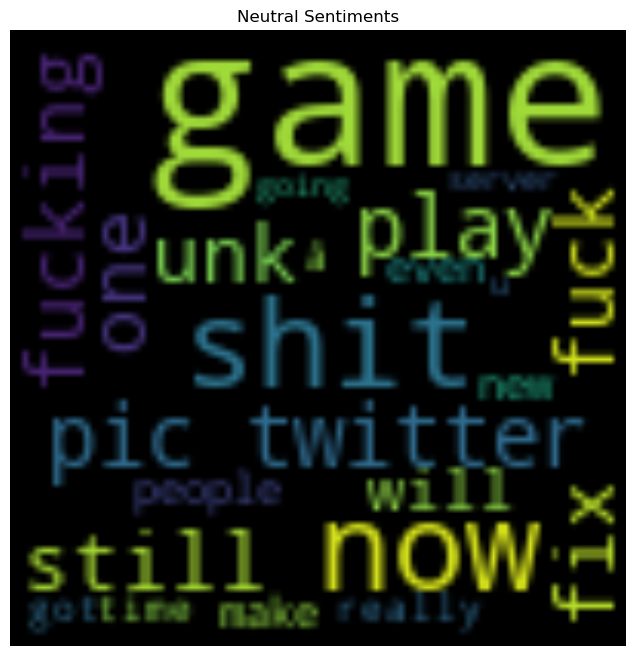

In [46]:
#Wordcloud representation of neutral sentiments
plt.figure(figsize=(8,8))
neu_tweets=df[df['sentiment']=='Neutral']
neu_text = ''.join(neg_tweets['text'])
wordcloud=WordCloud(width=100,height=100).generate(neu_text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Neutral Sentiments')
plt.axis('off')

(-0.5, 99.5, 99.5, -0.5)

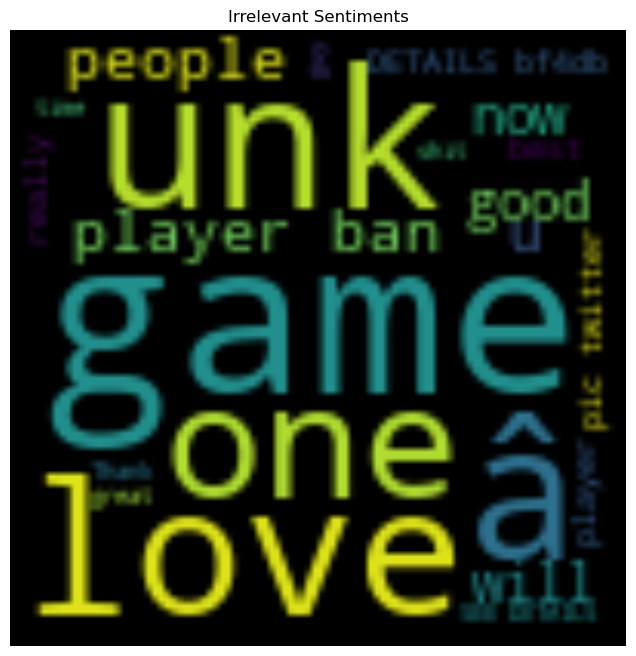

In [47]:
#Wordcloud representation of irrelevant sentiments
plt.figure(figsize=(8,8))
irr_tweets=df[df['sentiment']=='Irrelevant']
irr_text = ''.join(irr_tweets['text'])
wordcloud=WordCloud(width=100,height=100).generate(irr_text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Irrelevant Sentiments')
plt.axis('off')

In [80]:
#Define a function for character processing
def processing(content):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in content if char not in string.punctuation]
    # Join the characters to form the string.
    nopunc = ''.join(nopunc)
    #removing any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [81]:
#Split the data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['sentiment'], test_size=0.1, random_state=7)

In [98]:
#Printing the number of rows in training and testing set
print(X_train.shape, X_test.shape)

(64488,) (7166,)


In [82]:
#Building model
pipeline= Pipeline([
    ('bow',CountVectorizer(analyzer=processing)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [93]:
#Fitting a model
pipeline=pipeline.fit(X_train,y_train)

In [94]:
#Predicting the sentiments using the fitted model
pred=pipeline.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

  Irrelevant       0.98      0.46      0.63      1221
    Negative       0.67      0.92      0.77      2186
     Neutral       0.87      0.66      0.75      1740
    Positive       0.73      0.82      0.77      2019

    accuracy                           0.75      7166
   macro avg       0.81      0.72      0.73      7166
weighted avg       0.79      0.75      0.74      7166



In [95]:
#Finding out the accuracy score of the model built
accuracy_score(y_test,pred)

0.7503488696622942

In [96]:
#Printing the confusion matrix
print(confusion_matrix(y_test,pred))

[[ 566  331   67  257]
 [   3 2018   51  114]
 [   4  370 1141  225]
 [   6  308   53 1652]]
